In [1]:
import pandas as pd
import csv
import re
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
found = []
match = re.compile('^(\S+).*?(Repeat|Domain)'"\t"'(\w*)'"\t"'(\w*)')
with open("997_from uniprot.gff", "r") as f:
    searchlines = f.readlines()
for i, line in enumerate(searchlines): 
    found.extend(match.findall(line))

col_Names=["Entry", "Region","Start", "End"]
domain_position = pd.DataFrame(found,columns=col_Names)
print(domain_position.shape)
domain_position.head(2)

In [32]:
df = pd.read_csv('997_from uniprot.gff', sep = "\t", header = None)
df.rename(columns={int(0):'Entry',int(2): 'check',int(3): 'start',int(4): 'end',int(8): 'newName1'}, inplace=True)
print(df.shape)
df.head(2)

(51852, 10)


,Entry,1,check,start,end,5,6,7,newName1,9
0,O75581,UniProtKB,Signal peptide,1.0,19.0,.,.,.,Ontology_term=ECO:0000255;evidence=ECO:0000255,NaN
1,O75581,UniProtKB,Chain,20.0,1613.0,.,.,.,ID=PRO_0000017330;Note=Low-density lipoprotein...,NaN


In [ ]:
#df[df['newName1'].str.contains('(\S+).*?(Repeat|Domain)')==True]

In [76]:
#df2 = df[df['check'].str.contains('Repeat|Domain')==True]
#print(df2.shape)
#df2.to_csv("df2.csv")
df2 = pd.read_csv("df2.csv")
df3 = df2.drop(df2.columns[[0,2,3,6,7,8,9,10]], axis=1)
df3.head(2)
df3.shape

(5235, 3)

In [96]:
match = []
for row in df2['newName1']:
    match.append(re.findall(r'Note=([^;]*)',row))#r'Note=([^;]*)', row))
    #print(re.findall(r'Note=(\w*)(.?)(\w*)', row))
#domain_position['domain name']=pd.DataFrame(match)
df3['domain name']=pd.DataFrame(match)
#domain_position.to_csv("No_of_repeats.csv", sep = "\t")
df3['domain name'] = df3['domain name'].str.replace('\d+', '')
print(df3.shape)
df3.head()

(5235, 4)


,Entry,start,end,domain name
0,O75581,63,106,LDL-receptor class B
1,O75581,107,149,LDL-receptor class B
2,O75581,150,193,LDL-receptor class B
3,O75581,194,236,LDL-receptor class B
4,O75581,237,276,LDL-receptor class B


In [95]:
#len(match)#
#match.count("LDL-receptor class B")
#print(match)
match.index(['NR LBD'])

760

In [49]:
#to check the number and proteins with no domains 
dup_domain= pd.DataFrame(df3['Entry'].value_counts())#.unstack(0)
#Read list of all 997 proteins
proteins= pd.read_csv("List_of_975_proteins.list", header=None)
proteins.head()
con = pd.concat([df3['Entry'], proteins])
con.head()
no_domain = con.drop_duplicates(keep=False)
print(no_domain)
no_domain.to_csv("proteins_with_no_domain.csv")

               0
760       P03372
851       P49755
1488      Q16653
1495      Q15363
2325      Q9BVK6
...          ...
967       Q9UJ90
969       Q9NQ60
970       Q9UQV4
971   A0A087WTH5
973       Q9Y6H6

[128 rows x 1 columns]


(871, 2)


Text(0, 0.5, 'No. of Proteins')

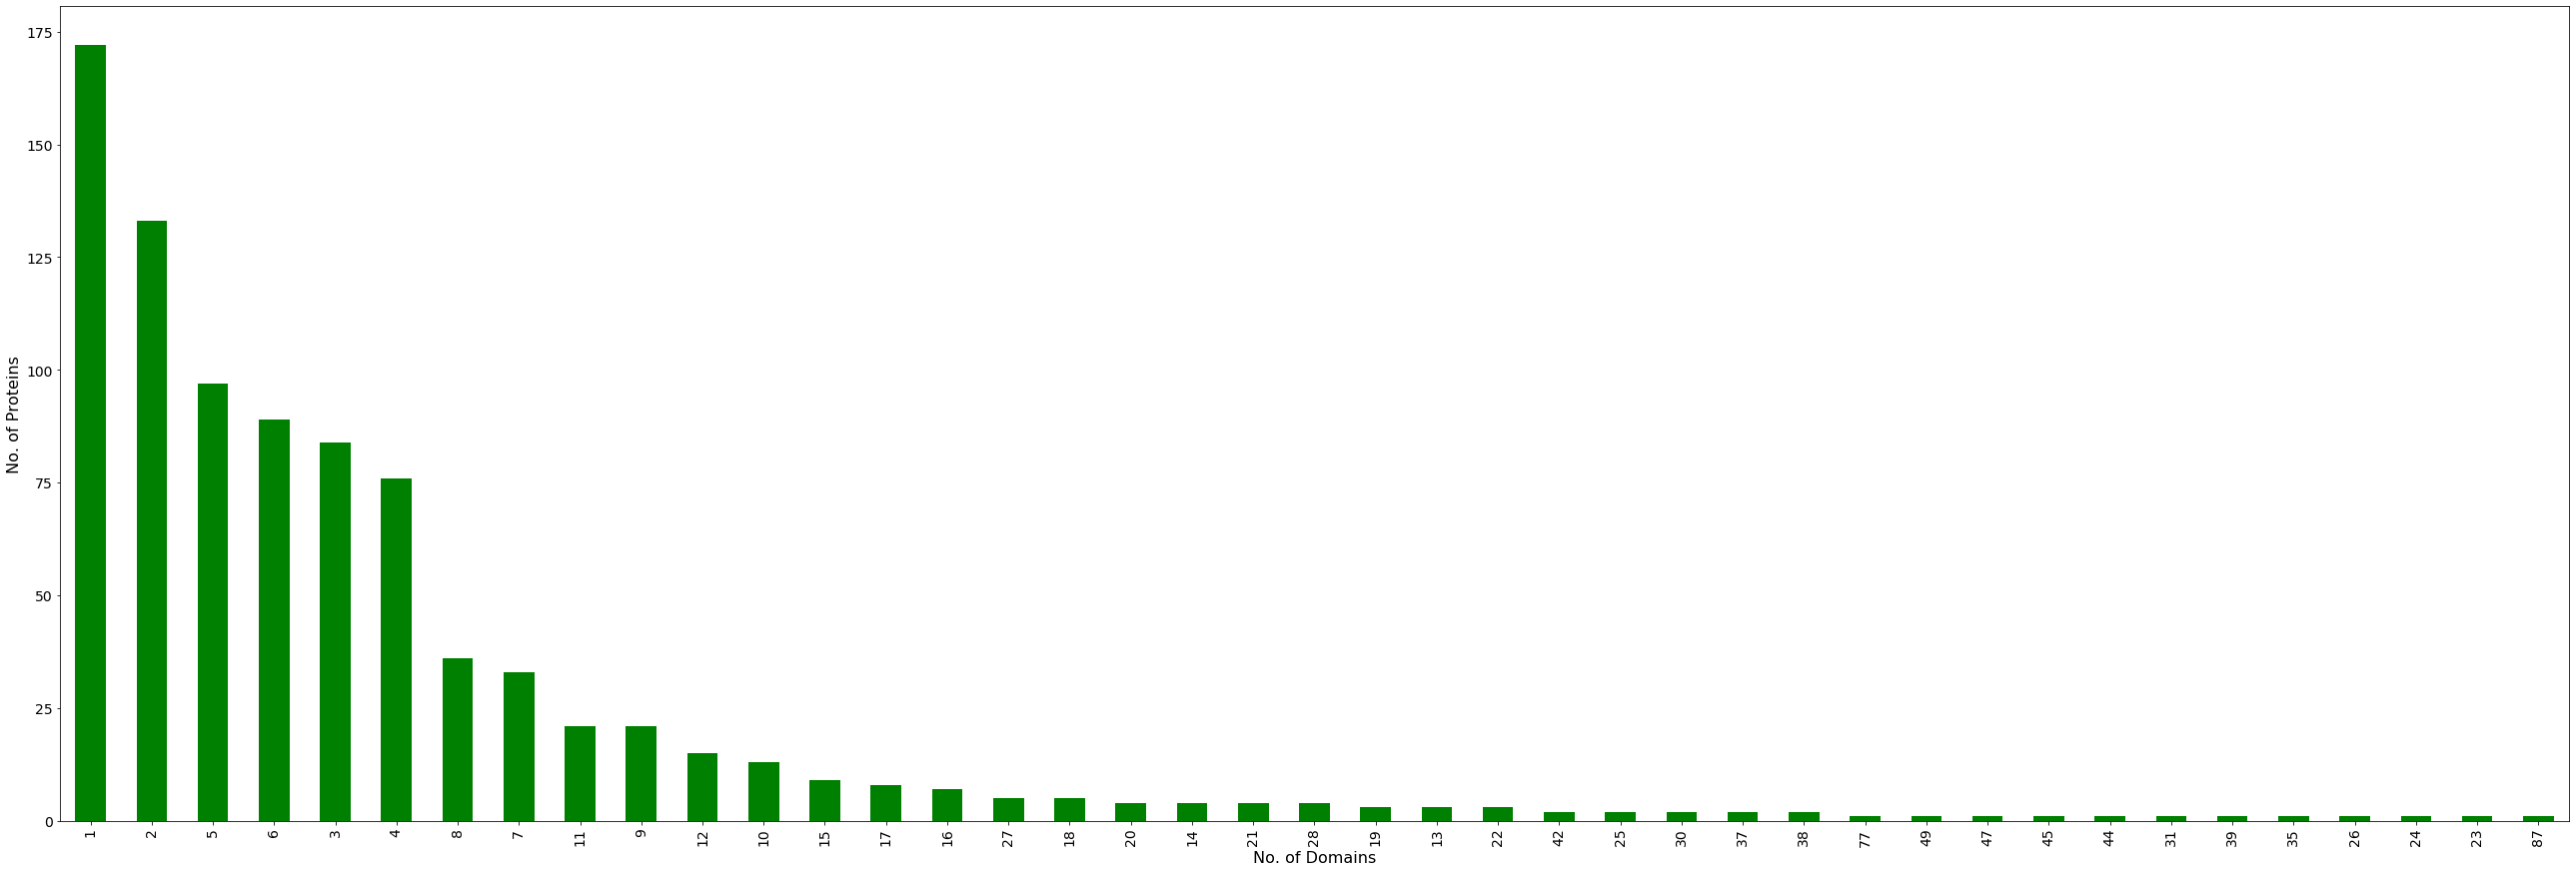

In [21]:
occurance = pd.read_csv("occurance.txt", sep = ",", header = 0)
occurance.head()
occurance.sort_values(by ='num', ascending=False )
f1 = occurance['num'].value_counts().plot(kind='bar',color='green',figsize=(45, 15), x='No. of Domains', fontsize = 14).get_figure()
xlabel("No. of Domains", fontsize = 16)
ylabel("No. of Proteins", fontsize = 16)
#f1.savefig('No_of_protein-domain.jpg',dpi=150)

In [6]:
df4 = df3[['Entry', 'domain name']]
#df4.sort_values(by ='domain name', ascending=False )
#xlabel("No. of Domains", fontsize = 16)
#ylabel("No. of Proteins", fontsize = 16)
#df4['domain name'].count().plot(kind='bar',color='green',figsize=(45, 5))#.get_figure().savefig('No_of_protein-domain.jpg')
df5 = df4.drop_duplicates(subset ="Entry") 
df5.to_csv("domain_class.csv")
#['Entry'].value_counts().plot(kind='bar',color='green',figsize=(45, 5))

In [7]:
#Entry_combine= domain_position.groupby(['Region','domain name'], as_index=False)['Entry'].agg(', '.join)
#Entry_combine.to_csv("entry_combine.txt")
combine = df3[['Entry','domain name']]
#plt.figure(figsize=(20, 7))
#combine.groupby(['domain name']).count().plot(kind='bar',figsize=(25, 10),fontsize=10, color='red')
#combine.groupby(['Entry']).count().plot(kind='bar',figsize=(35, 10))
hist = combine.groupby(['Entry']).count()
domain_hist = combine.groupby(['domain name']).count()

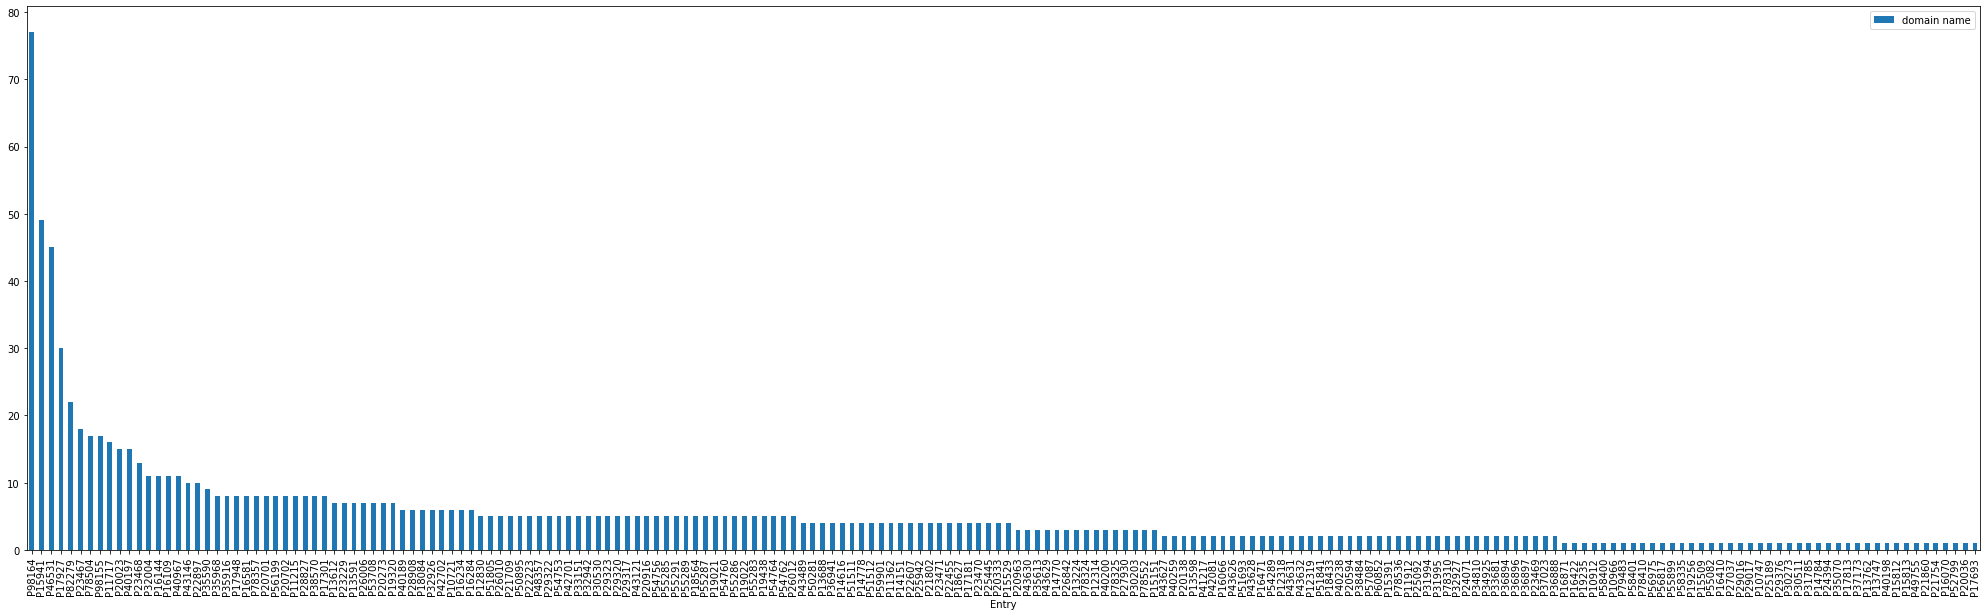

In [8]:
hist = combine.groupby(['Entry']).count()
#hist.to_csv("prot_vs_domain.txt",sep="\t")
hist1 = hist.iloc[190:390,:]
hist1 = hist1.sort_values(by ='domain name', ascending=False )
plt = hist1.plot(kind='bar',figsize=(35, 10)).get_figure()#.savefig('prot_vs_domain.jpg')
#hist1.savefig('prot_vs_domain.jpg')

In [9]:
print(hist.head())
print(domain_hist.shape)

            domain name
Entry                  
A0A024R2B2            5
A0A024R8K7            4
A0A024R8T0            4
A0A024RC29            6
A0A024RC30            4
(148, 1)


Text(0.5, 0, 'Domain name')

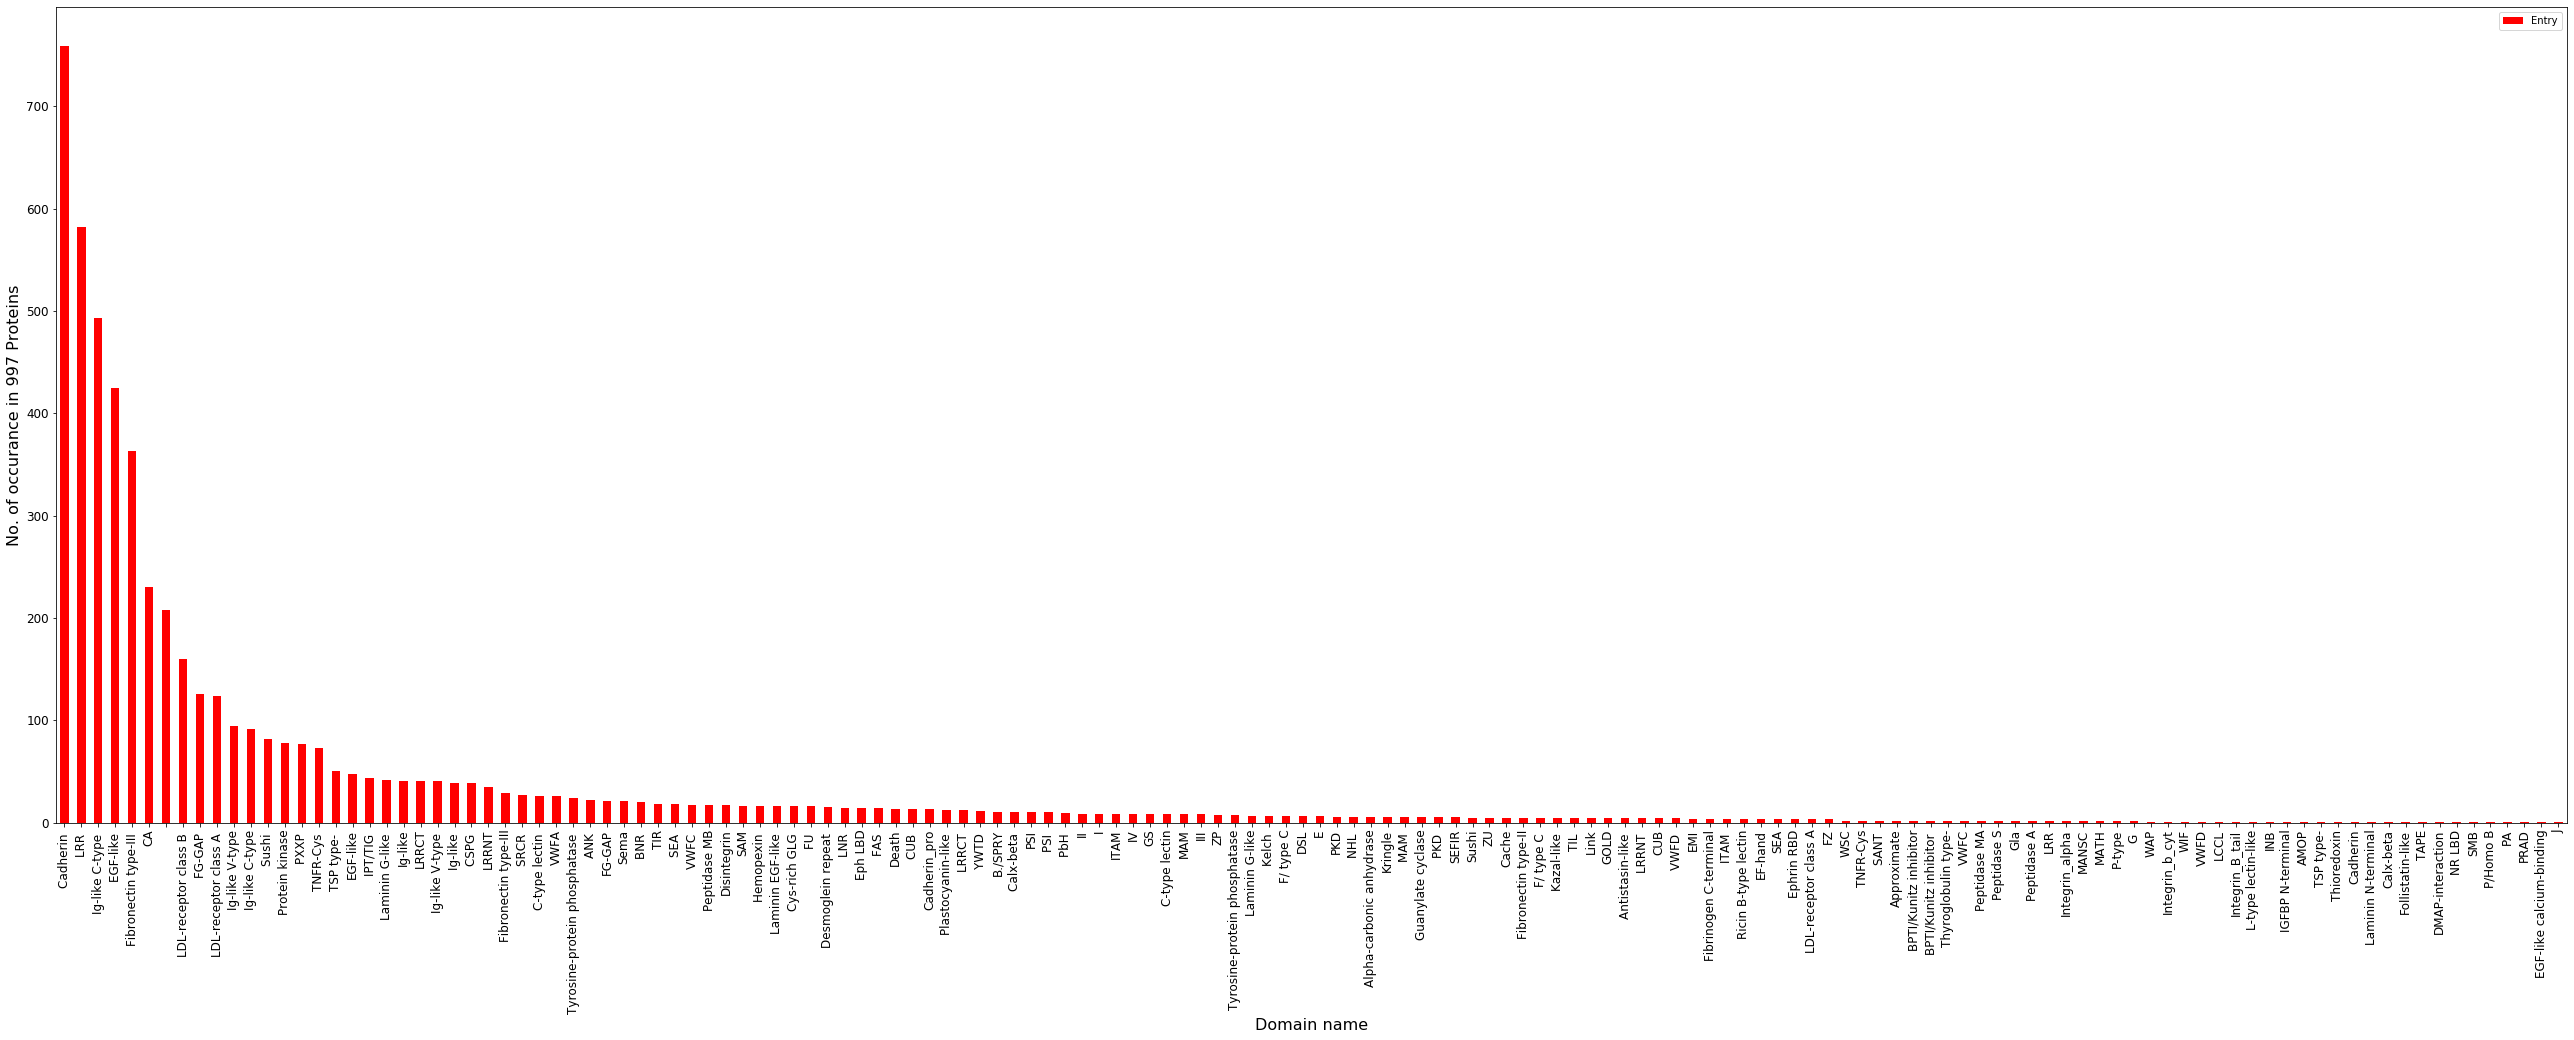

In [10]:
gf = combine.groupby(['domain name']).count()
gf1 = gf.iloc[50:190,:]
gf = gf.sort_values(by ='Entry', ascending=False )
gf.to_csv("Domain_vs_no_prot.txt", sep="\t")
f2 = gf.plot(kind='bar',figsize=(45, 15),color='red', fontsize = 12).get_figure()
ylabel("No. of occurance in 997 Proteins", fontsize = 16)
xlabel("Domain name", fontsize = 16)
f2.savefig('Domain_vs_no.of_prot.jpg', dpi=150)

In [11]:
df4 = df3.groupby(['Entry', 'domain name'])['Entry'].count().unstack('domain name').fillna(0.0)
#df4[['Entry', 'domain name']].plot(kind='bar', stacked=True)
df4.to_csv("stacked.csv")
df4.head(3)

domain name,,AMOP,ANK,Alpha-carbonic anhydrase,Antistasin-like,Approximate,B./SPRY,BNR,BPTI/Kunitz inhibitor,BPTI/Kunitz inhibitor,...,VWFC,VWFC,VWFD,VWFD,WAP,WIF,WSC,YWTD,ZP,ZU
Entry,,,,,,,,,,,,,,,,,,,,,
A0A024R2B2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A024R8K7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0A024R8T0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(871, 148)


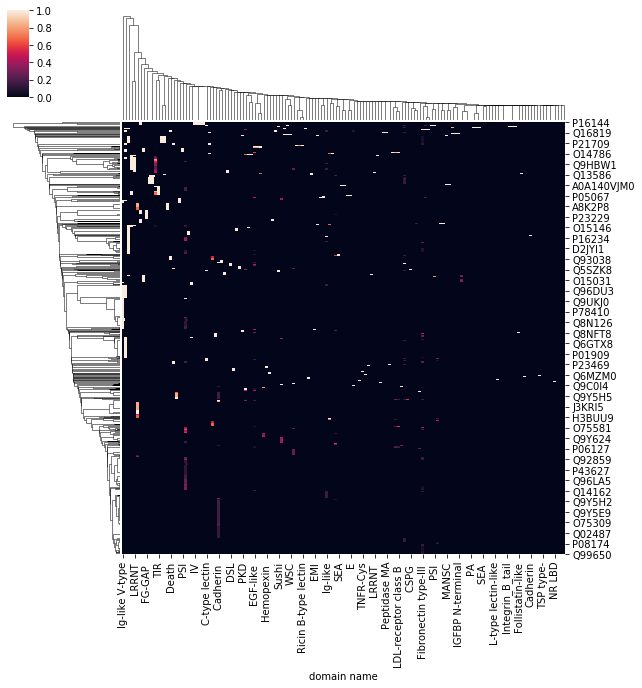

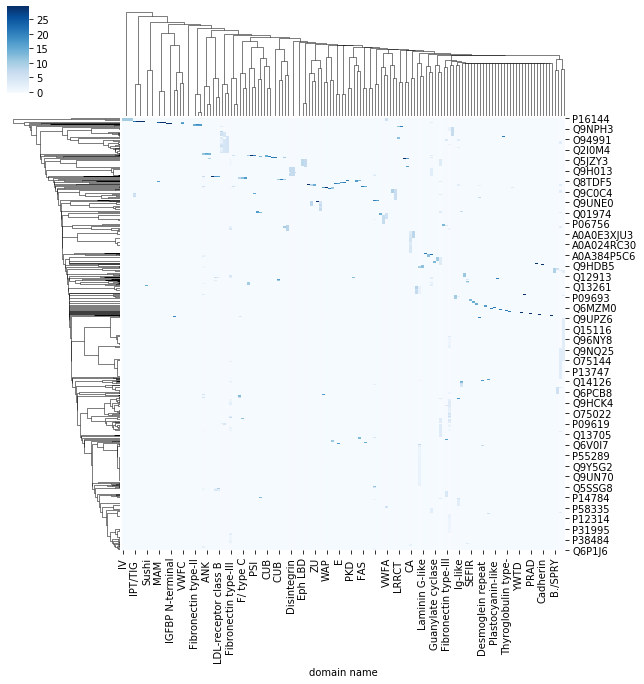

In [12]:
import seaborn as sns

dataframe = df3.groupby(['Entry', 'domain name'])['Entry'].count().unstack('domain name').fillna(0.0)

print(dataframe.shape)
del dataframe.index.name

# plot
sns.clustermap(dataframe, standard_scale=1)#.savefig("heatmap_standard.png")
sns.clustermap(dataframe, z_score=1,metric="euclidean", method="ward", cmap="Blues")#.savefig("heatmap2_euclidean.png")
#df4.head()

In [18]:
checker = df3.groupby(['Entry', 'domain name'])['Entry'].count().unstack('domain name')
del checker.index.name
checker.head()

domain name,,AMOP,ANK,Alpha-carbonic anhydrase,Antistasin-like,Approximate,B./SPRY,BNR,BPTI/Kunitz inhibitor,BPTI/Kunitz inhibitor,...,VWFC,VWFC,VWFD,VWFD,WAP,WIF,WSC,YWTD,ZP,ZU
A0A024R2B2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0A024R8K7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0A024R8T0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0A024RC29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0A024RC30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


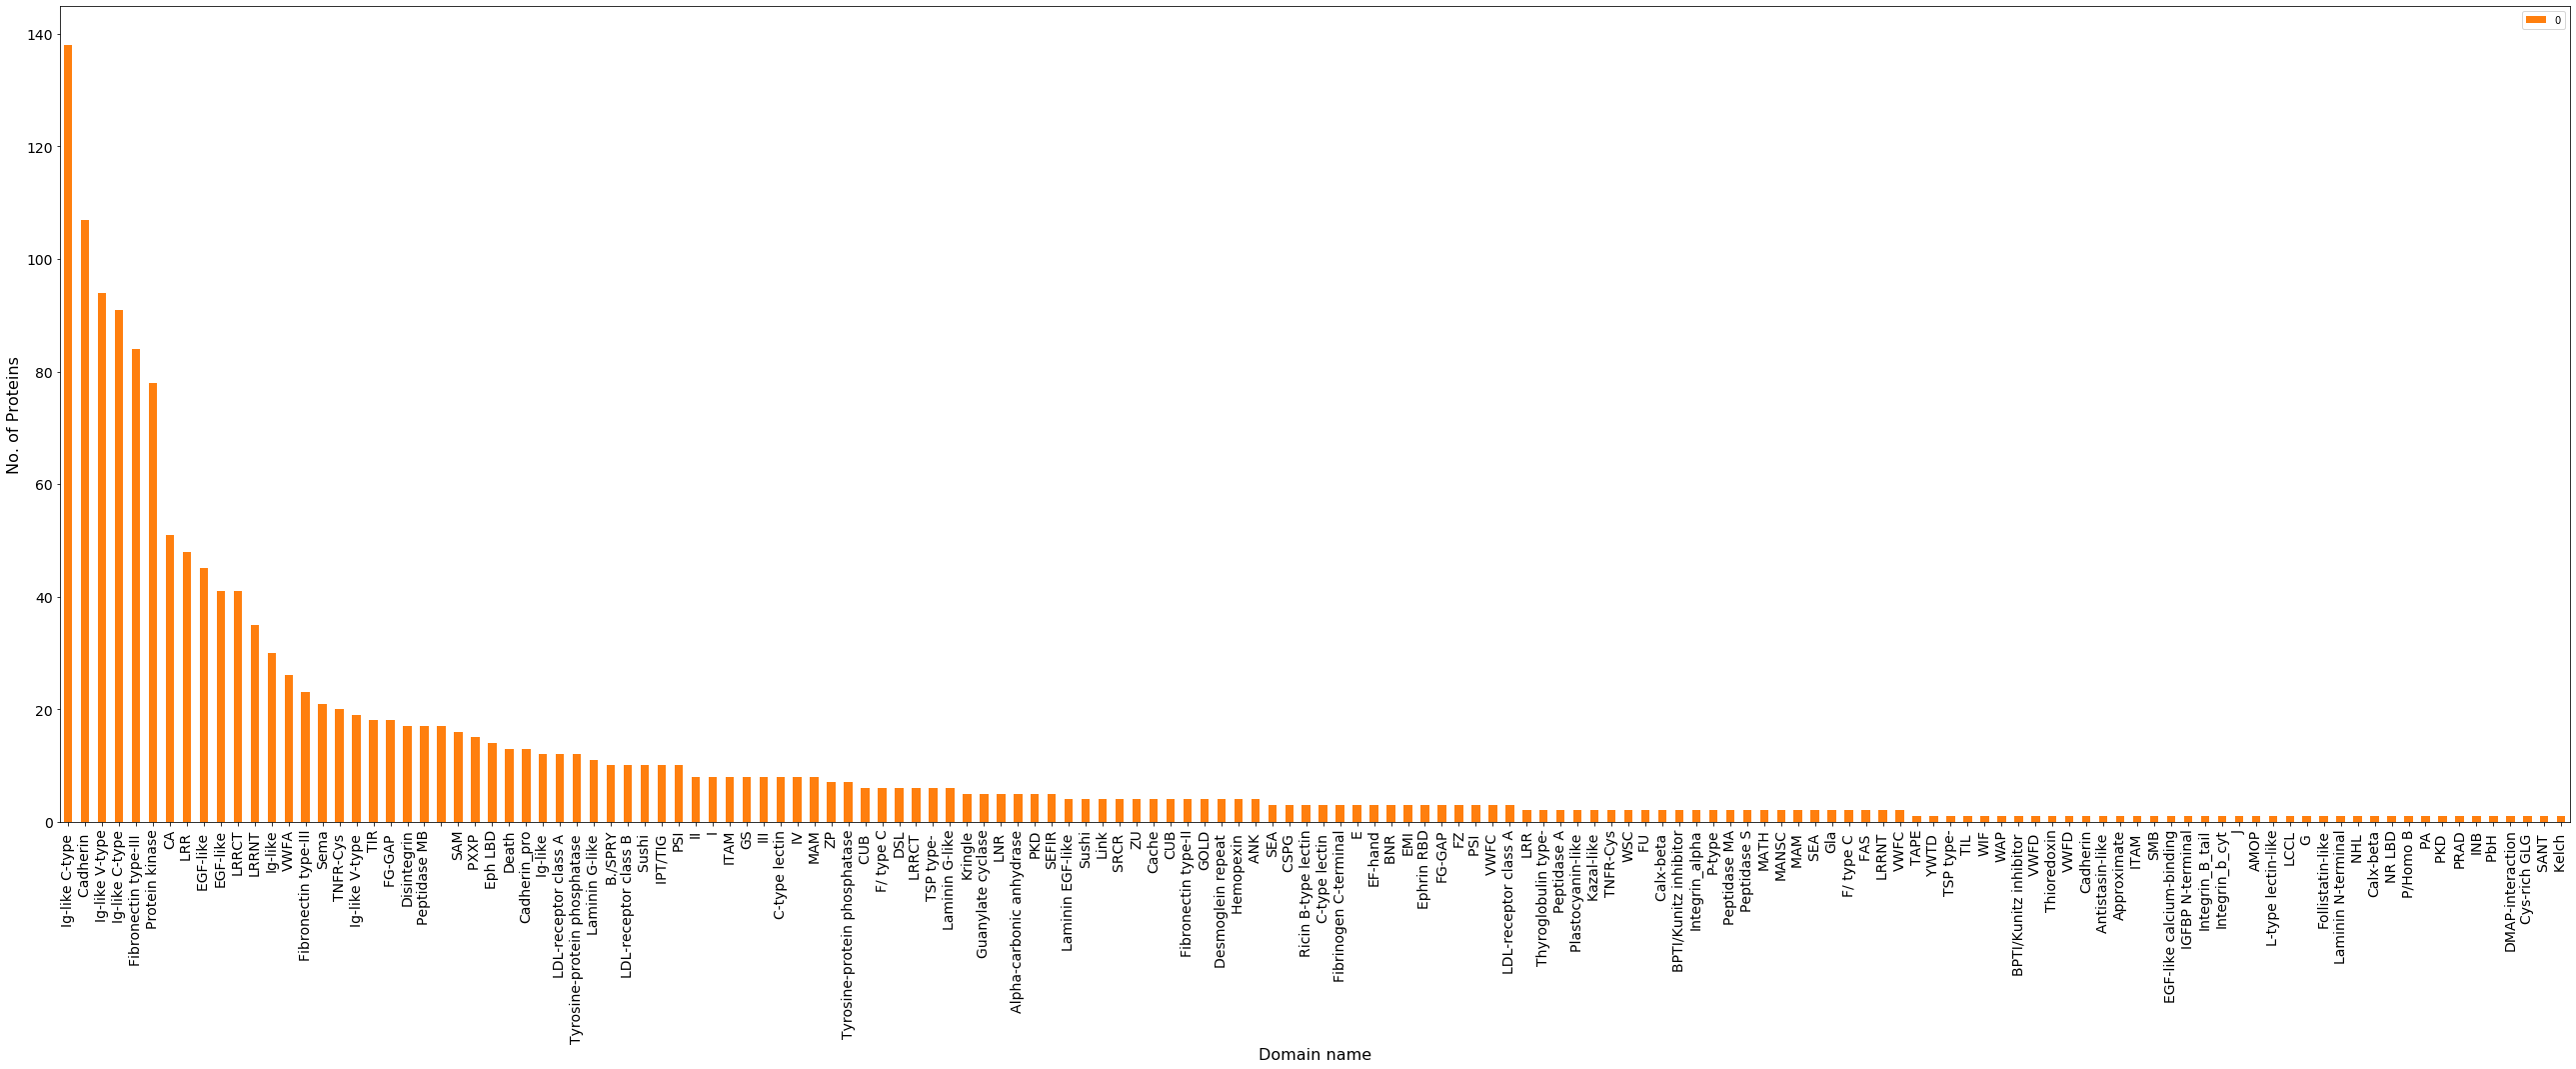

In [20]:
domains = pd.DataFrame(checker.count())
#del domains.index.sort_values(by ='num', ascending=False )
f3 = domains.sort_values(by = 0,ascending=False ).plot(kind='bar',color='C1',figsize=(45, 15), fontsize=14).get_figure()
ylabel("No. of Proteins", fontsize = 16)
xlabel("Domain name", fontsize = 16)
f3.savefig('Domain-name_vs_numprot.png', dpi=150)#head()

In [57]:
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
nf = pd.read_csv(url)
nf = nf.set_index('model')

del nf.index.name
nf.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
#pd.read_csv("https___www.ebi.ac.uk_443_interpro_wwwapi__entry_all_protein_unreviewed_A0A024RC29__extra_fields=counters_tsv", sep = "\t")